# Phase A Feature Importance 시각화

전처리 이후 Phase A 모델에 대해 계산한 SHAP, Permutation 중요도, 상관관계를 한눈에 확인하기 위한 노트북입니다.

In [1]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import polars as pl
import seaborn as sns

sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

DATASETS = {
    'clean': {
        'train': Path('/Competition/CTR/toss-ad-click-prediction/data/clean/train_processed.parquet'),
        'analysis': Path('/Competition/CTR/toss-ad-click-prediction/logs/analysis/lightgbm_phase_a_clean_shap_permutation.json'),
    },
    'clean_corr96': {
        'train': Path('/Competition/CTR/toss-ad-click-prediction/data/clean_corr96/train_processed.parquet'),
        'analysis': Path('/Competition/CTR/toss-ad-click-prediction/logs/analysis/lightgbm_phase_a_clean_corr96_shap_permutation.json'),
    },
    'random_clean_corr96': {
        'train': Path('/Competition/CTR/toss-ad-click-prediction/data/samples/train_downsample_random_clean_corr96.parquet'),
        'analysis': Path('/Competition/CTR/toss-ad-click-prediction/logs/analysis/lightgbm_phase_random_clean_corr96_shap_permutation.json'),
    },
    'phase_b_clean_corr96': {
        'train': Path('/Competition/CTR/toss-ad-click-prediction/data/samples/train_downsample_phase_b_clean_corr96.parquet'),
        'analysis': Path('/Competition/CTR/toss-ad-click-prediction/logs/analysis/lightgbm_phase_b_clean_corr96_shap_permutation.json'),
    },
}

DATASET_KEY = 'clean'  # 확인하고 싶은 버전으로 변경
paths = DATASETS[DATASET_KEY]
SHAP_PERM_PATH = paths['analysis']
TRAIN_PATH = paths['train']

if not SHAP_PERM_PATH.exists():
    raise FileNotFoundError(f'SHAP/Permutation 기록이 없습니다: {SHAP_PERM_PATH}')
if not TRAIN_PATH.exists():
    raise FileNotFoundError(f'전처리된 train 파일이 없습니다: {TRAIN_PATH}')


In [2]:
with SHAP_PERM_PATH.open('r', encoding='utf-8') as f:
    metrics = json.load(f)

shap_list = metrics.get('shap_top30') or metrics.get('shap_all')
perm_list = metrics.get('permutation_top30') or metrics.get('permutation_all')
if shap_list is None or perm_list is None:
    raise KeyError('SHAP/Permutation 리스트를 찾을 수 없습니다.')

shap_df = pd.DataFrame(shap_list)
perm_df = pd.DataFrame(perm_list)
base_metrics = metrics['base_metrics']

print('샘플 크기:', metrics['sample_size'])
print('기준 AP:', base_metrics['ap'])
print('기준 WLL:', base_metrics['wll'])
print('기준 Score:', base_metrics['score'])


샘플 크기: 100000
기준 AP: 0.47939029755860274
기준 WLL: 0.7651365520799022
기준 Score: 0.5229593525661631


/tmp/ipykernel_3978618/2574135948.py:7: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3978618/2574135948.py:7: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3978618/2574135948.py:7: UserWarning: Glyph 51208 (\N{HANGUL SYLLABLE JEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3978618/2574135948.py:7: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3978618/2574135948.py:7: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3978618/2574135948.py:7: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3978618/2574135948.py:7: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sa

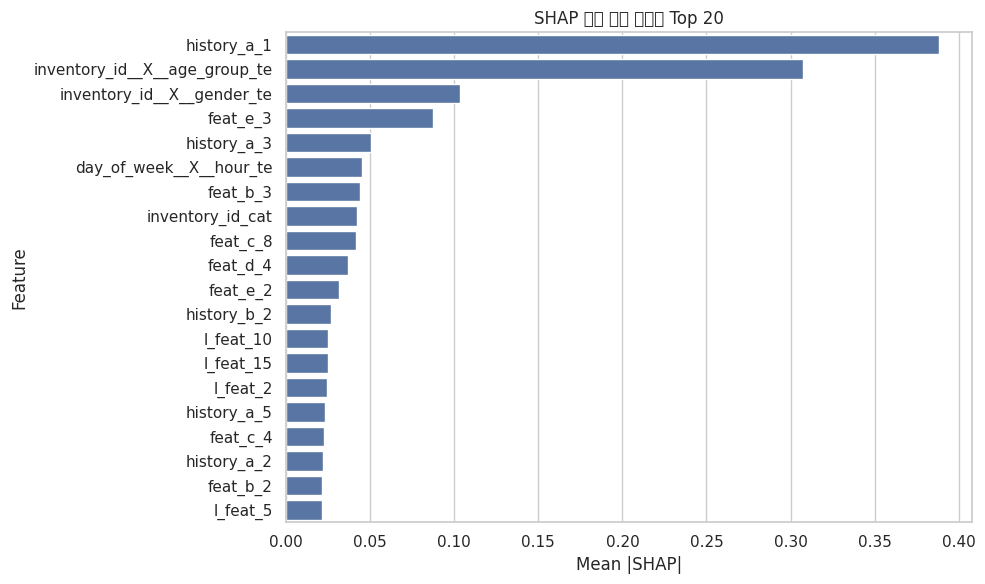

In [3]:
top_k = 20
value_col = 'mean_abs_shap' if 'mean_abs_shap' in shap_df.columns else shap_df.columns[1]
fig, ax = plt.subplots()
sns.barplot(data=shap_df.head(top_k), x=value_col, y='feature', ax=ax, color='#4C72B0')
ax.set_title(f'SHAP 평균 절대 기여도 Top {top_k}')
ax.set_xlabel(value_col)
ax.set_ylabel('Feature')
plt.tight_layout()
plt.show()


/tmp/ipykernel_3978618/2671728679.py:8: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3978618/2671728679.py:8: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3978618/2671728679.py:8: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.can

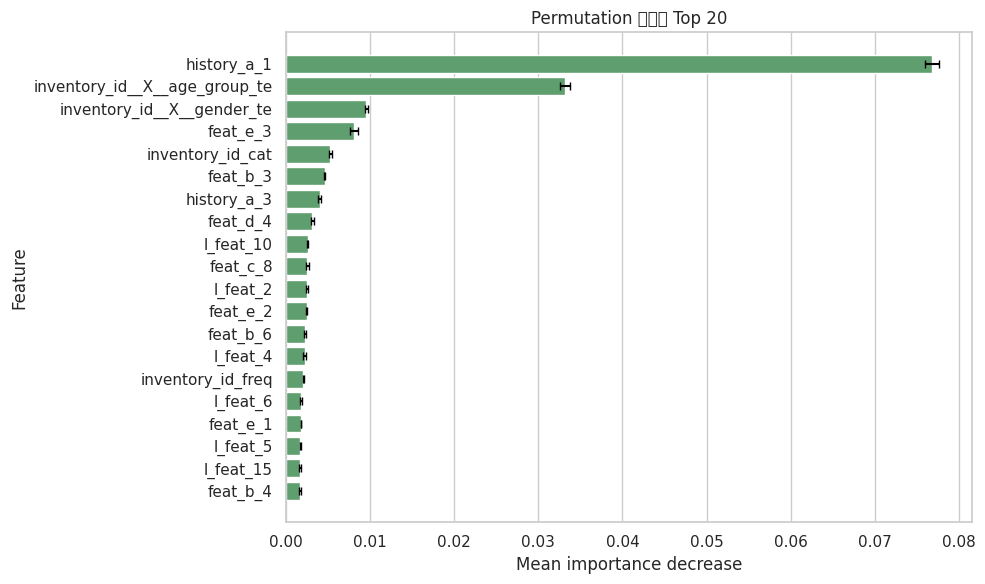

In [4]:
top_k = 20
mean_col = 'mean_importance' if 'mean_importance' in perm_df.columns else perm_df.columns[1]
std_col = 'std_importance' if 'std_importance' in perm_df.columns else None
fig, ax = plt.subplots()
sns.barplot(data=perm_df.head(top_k), x=mean_col, y='feature', ax=ax, color='#55A868')
if std_col:
    ax.errorbar(perm_df.head(top_k)[mean_col], range(len(perm_df.head(top_k))),
                xerr=perm_df.head(top_k)[std_col], fmt='none', color='black', capsize=3)
ax.set_title(f'Permutation 중요도 Top {top_k}')
ax.set_xlabel(mean_col)
ax.set_ylabel('Feature')
plt.tight_layout()
plt.show()


## 상관관계 분석

전처리된 학습 데이터 전체를 대상으로 수치형 피처 상관관계를 계산합니다.
필요시 샘플링을 켜려면 `USE_SAMPLE` 변수를 `True`로 바꾸세요.

In [5]:
USE_SAMPLE = False
SAMPLE_ROWS = 200_000

train_frame = pl.read_parquet(TRAIN_PATH)
print('원본 행 수:', train_frame.height)

if USE_SAMPLE and train_frame.height > SAMPLE_ROWS:
    print(f'Sampling {SAMPLE_ROWS} rows for correlation...')
    train_frame = train_frame.sample(n=SAMPLE_ROWS, shuffle=True, seed=42)

numeric_cols = [col for col, dtype in zip(train_frame.columns, train_frame.dtypes) if dtype.is_numeric()]
if 'clicked' in numeric_cols:
    numeric_cols.remove('clicked')

print('상관관계 대상 수치형 피처 수:', len(numeric_cols))

corr_df = train_frame.select(numeric_cols).to_pandas()
correlation = corr_df.corr()


원본 행 수: 10704179
상관관계 대상 수치형 피처 수: 129


/tmp/ipykernel_3978618/3123924038.py:4: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3978618/3123924038.py:4: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3978618/3123924038.py:4: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3978618/3123924038.py:4: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3978618/3123924038.py:4: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3978618/3123924038.py:4: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3978618/3123924038.py:4: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from font(s) DejaVu Sans.

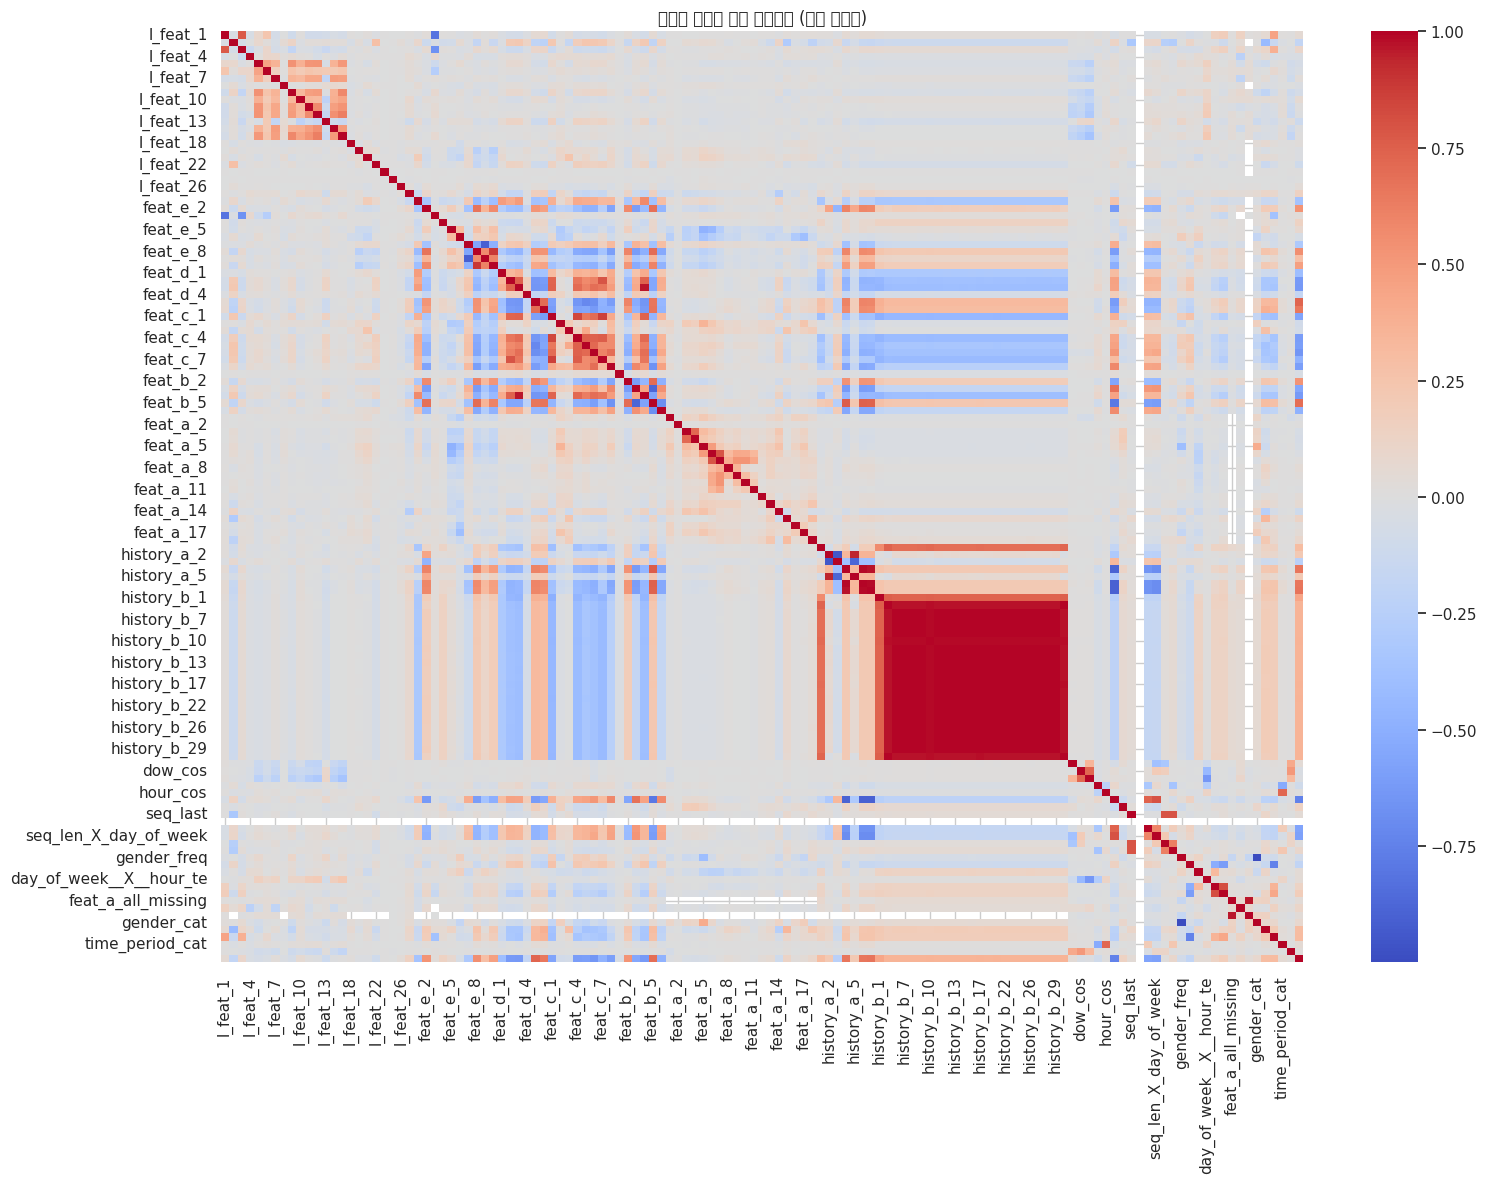

In [6]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation, cmap='coolwarm', center=0, annot=False)
plt.title('전처리 수치형 피처 상관관계 (전체 데이터)')
plt.tight_layout()
plt.show()


### 참고
- 전체 데이터 기반 상관관계이므로 계산 시간이 다소 걸릴 수 있습니다.
- 필요에 따라 `USE_SAMPLE`을 `True`로 설정하면 샘플링 기반으로 빠르게 확인할 수 있습니다.